<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/Machine_learning_Clustering_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В предложенных файлах информация с публичных слушаний Москвы по правилам землепользования и застройки (ПЗЗ). В них комментарии жителей города были застенагрофированы, проклассифицированы (за/против) и нанесены на карту. Данные предоставлены в 2 вариантах, для задания можно использовать любой:

geo_comment.xlsx
comment - комментарий одного или списка жителей к проект
multiplier - количество авторов комментария (может быть 1, может быть список)
x, y - координаты адреса, по которому был дан определённой комментарий
comment_class - за (1) / против (-1)

визуально разделить город на районы безотносительно голосов (провести кластеризацию и вывести картинку)
аналогично исследовать скопления голосов за и против отдельно
подобрать оптимальное число кластеров при помощи кода из тетрадки в конце занятия (оптимально)
приложить ссылку на гитхаб
Дополнительные задания

найти наиболее активные в голосовании районы (подсказка: DBSCAN, не плотные районы обозначены одной меткой и закрашены одним цветом, cmap=‘gray’)
для тех, кто уже попробовал работу с текстом: выделить основные тематики комментариев жителей, можно использовать всю имеющуюся дополнительную информацию

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [0]:
data = pd.read_excel('geo_comment.xlsx')

In [5]:
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...


In [6]:
len(data)

70382

In [0]:
data['xy'] = data['x'] + data['y']

In [8]:
data.head()

,Unnamed: 0,x,y,comment_class,multiplier,comment,xy
0,0,37.612416,55.777454,-1,1,Во все разделы правил землепользования и застр...,93.389870
1,1,37.612416,55.777454,-1,1,На основании вступившего в законную силу судеб...,93.389870
2,2,37.603298,55.742108,-1,1,Внести в Проект правил землепользования и заст...,93.345406
3,3,37.558526,55.728758,-1,1,Учитывая социальную значимость проекта строите...,93.287284
4,4,37.566431,55.731794,-1,1,Учитывая социальную значимость проекта строите...,93.298225


In [9]:
print(len(data['xy'].value_counts().unique()))

145


In [0]:
X = np.array(data['xy']).reshape(-1,1)
X = StandardScaler().fit_transform(X)

In [0]:
clusstering = DBSCAN(eps=0.1, min_samples=1, leaf_size=3).fit(X)

In [28]:
clusstering

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=1, n_jobs=None, p=None)

In [46]:
clusstering.labels_

array([0, 0, 0, ..., 0, 0, 0])

In [0]:
a = []
for item in clusstering.labels_:
  if item not in a:
    a.append(item)

In [48]:
a

[0, 1, 2, 3, 4, 5]

TypeError: ignored

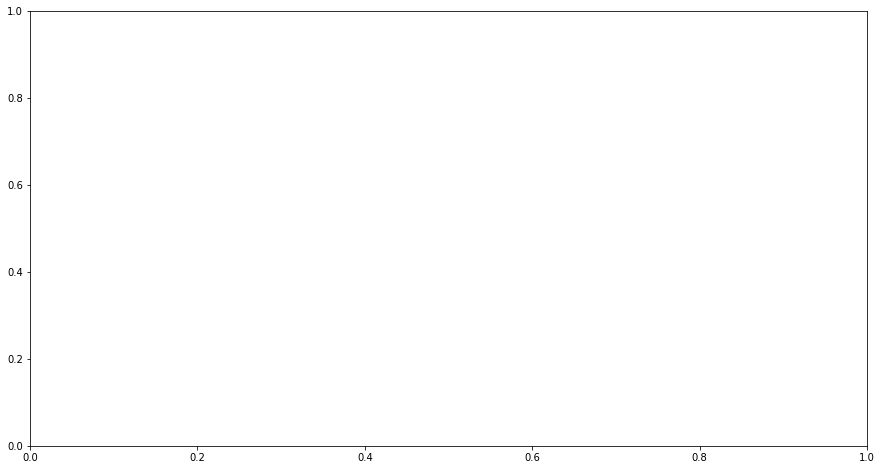

In [63]:
fig, axes = plt.subplots(figsize=(15, 8))
alpha = 0.3
axes.scatter(X, X, c=item, cmap='autumn', s=60, alpha=alpha)